## Data Preparation and Understanding Sample Modelling and Performance Measure

In [1]:
# Now, Let's prepare the data for ML algorithms

In [2]:
# Importing the necessary libraries

import os
import numpy as np
import pandas as pd

In [3]:
# To display all the columns in the dataframe

pd.set_option('display.max_columns', None)

In [4]:
# Reading the train and test sets (These were split before EDA)

def read_data(filename):
    return pd.read_csv(os.path.join('dataset', filename), index_col='index').rename_axis(None)

In [5]:
df_train = read_data('df_train.csv')
df_test = read_data('df_test.csv')
data = read_data('data.csv')

In [6]:
print(df_train.shape)
print(df_test.shape)
print(data.shape)

(1176, 35)
(294, 35)
(1176, 45)


In [7]:
# Encoding the target variable in both train and test set

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['Attrition'] = le.fit_transform(df_train['Attrition'])

df_test['Attrition'] = le.transform(df_test['Attrition'])

In [8]:
# Separating X and y i.e. the independent tariables and the target variable

employees = df_train.drop('Attrition', axis=1)
employees_labels = df_train['Attrition'].copy()

employees_test = df_test.drop('Attrition', axis=1)
employees_test_labels = df_test['Attrition'].copy()

In [9]:
print(employees.shape, employees_labels.shape)
print(employees_test.shape, employees_test_labels.shape)

(1176, 34) (1176,)
(294, 34) (294,)


In [10]:
# Data Cleaning 
    # 1. Remove unnecessary attributes
    # 2. Handle missing values if any

In [11]:
# 1. Dropping unnecessary variables from both train and test sets

unnecessary_vars = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

employees = employees.drop(unnecessary_vars, axis=1)
employees_test = employees_test.drop(unnecessary_vars, axis=1)

In [12]:
# 2. Checking if there are any missing values

employees.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
employees_test.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
# There aren't any missing values in any of the variables

In [15]:
# Handling numeric variables

employees_num = employees.select_dtypes(exclude='object')

employees_num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
# Let's create a custom class to add the derived attribute 'MonthlRateToIncome_Diff'

from sklearn.base import BaseEstimator, TransformerMixin

monthly_rate_idx, monthly_income_idx = 16, 15

class AddDerivedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        monthly_rate_to_income_diff = X[:, monthly_rate_idx] - X[:, monthly_income_idx]
        return np.c_[X, monthly_rate_to_income_diff]

In [17]:
# Handling Categorical Attributes

employees_cat = employees.select_dtypes(include='object')

employees_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
941,Travel_Rarely,Research & Development,Technical Degree,Female,Laboratory Technician,Married,No
865,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Divorced,No
18,Travel_Rarely,Sales,Life Sciences,Female,Manager,Married,No
786,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Married,No
416,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Married,Yes
...,...,...,...,...,...,...,...
1332,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Single,Yes
159,Travel_Frequently,Sales,Marketing,Female,Sales Representative,Married,No
318,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Single,Yes
1286,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Married,No


In [18]:
# Using one hot encoding technique to encode all the categorical variables

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

employees_cat_1hot = ohe.fit_transform(employees_cat)

In [19]:
len(employees_cat_1hot.toarray()[0])

28

In [20]:
# Building the pipeline for both numeric and categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attrs = list(employees_num.columns)
cat_attrs = list(employees_cat.columns)

# Pipeline step to add the derived attribute MonthlyRateToIncomeDiff
add_derived_attributes_pipeline = Pipeline([
    ('attribute_adder', AddDerivedAttributes())
])

# Pipeline to scale all the numeric attributes using standard scaler and encode all the categorical attributes using 
# one-hot-encoding
transform_pipeline = ColumnTransformer([
    ('scaling', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('one_hot_encoding', OneHotEncoder(), make_column_selector(dtype_include=object))
])

# Full Pipeline combining above two
full_pipeline = Pipeline([
    ('transform', transform_pipeline),
    ('add_derived_attributes', add_derived_attributes_pipeline),
])

In [21]:
employees_prepared = full_pipeline.fit_transform(employees)

In [22]:
employees_test_prepared = full_pipeline.transform(employees_test)

# 

## Modelling

In [25]:
# Let's start with training a SGD Classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(employees_prepared, employees_labels)

SGDClassifier(random_state=42)

In [36]:
# Let's predict for one of the employee's instance

sgd_clf.predict([employees_prepared[0]])

array([0])

In [40]:
employees_labels.head(1)

941    0
Name: Attrition, dtype: int32

In [ ]:
# The prediction is also 0 and the actual label is also 0. This is a correct prediction

In [43]:
# Let's predict and see for a positive case

employees_labels.head(20)

941     0
865     0
18      0
786     0
416     0
1265    0
1062    0
875     0
535     0
1217    0
1159    0
89      1
641     0
1278    0
99      0
544     0
1298    1
797     1
906     0
266     0
Name: Attrition, dtype: int32

In [52]:
# 11th index has positive label let's predict for it

sgd_clf.predict([employees_prepared[11]])

array([0])

In [53]:
# 17th index is also positive let's see for that

sgd_clf.predict([employees_prepared[17]])

array([1])

In [ ]:
# With this we can see that our model is able to predict for both the classes but it is not very accurate and it's making
# some mistake. Above we can see that it did not predict properly for 11th index

In [55]:
# Let's now evaluate the model
# A good way to evaluate a model is by using cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(estimator=sgd_clf, X=employees_prepared, y=employees_labels, cv=3, scoring='accuracy')    # 3 folds

array([0.74744898, 0.78571429, 0.83163265])

In [ ]:
# We have obtained atleast more than 74% accuracy on all the folds

In [56]:
# But wait, We know that we should not evaluate a model based on the accuracy.
# So, Let's look at the confusion matrix

In [57]:
# In order to compute the confustion matrix we need to have the predictions in place. so, let's make the predictions on the
# entire train set

## Note: DO NOT TOUCH THE TEST SET UNTIL YOU FINALIZE A MODEL AND YOUR ARE READY TO LAUNCH IT

In [140]:
# Let's make the predictions using cross_val_predict

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(estimator=sgd_clf, X=employees_prepared, y=employees_labels, cv=3)

y_train_pred

array([0, 0, 0, ..., 1, 0, 1])

In [60]:
# Let's compute the confusion matrix now

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=employees_labels, y_pred=y_train_pred)

array([[819, 167],
       [ 82, 108]], dtype=int64)

In [ ]:
# Confusion Matrix Interpretation:
#            Predicted
#             0    1
# Actual 0 [ TN   FP ]
#        1 [ FN   TP ]
#

In [ ]:
# Using confusion matrix we can compute the Precision and Recall scores

## Precision: Out of all the predicted positives, how many of them are actually positive
## Recall: Out of all the actual positives, how many of them are correctly predicted/identified by our model

In [61]:
# Let's compute the precision and recall

from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_true=employees_labels, y_pred=y_train_pred)}')
print(f'Recall: {recall_score(y_true=employees_labels, y_pred=y_train_pred)}')

Precision: 0.3927272727272727
Recall: 0.5684210526315789


In [ ]:
# So, Now our model does not look as good as it did when we looked at the accuracy 

In [ ]:
# Our model is able to detect only 56% of the employees who left the company and when our model claims that an
# employee has left the company, it is correct only 39% of the times.

# With this metrics we can confirm that our model is really bad.

In [ ]:
# NOTE: If we try to increase precision, recall reduces and vice versa so, there is always a tradeoff between 
#       precision and recall

In [ ]:
# To understand this tradeoff, let’s look at how the SGDClassifier makes its classification
# decisions. For each instance, it computes a score based on a decision function,
# and if that score is greater than a threshold, it assigns the instance to the positive
# class, or else it assigns it to the negative class.

In [72]:
# how do you decide which threshold to use? For this you will first need to get the
# scores of all instances in the training set using the cross_val_predict() function
# again, but this time specifying that you want it to return decision scores instead of
# predictions

y_scores = cross_val_predict(estimator=sgd_clf, X=employees_prepared, y=employees_labels, cv=3, method='decision_function')

y_scores

array([-10.54515886,  -5.49524793, -13.5161255 , ...,   2.27563743,
        -6.60499695,   7.98759106])

In [74]:
# Now with these scores we can compute precision and recall for all possible thresholds
# using the precision_recall_curve() function

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true=employees_labels, probas_pred=y_scores)

In [123]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.grid(True)
    plt.axis([-60, 40, 0, 1])
    plt.xlabel('Threshold')
    plt.title('Precision and Recall vs Thresholds')

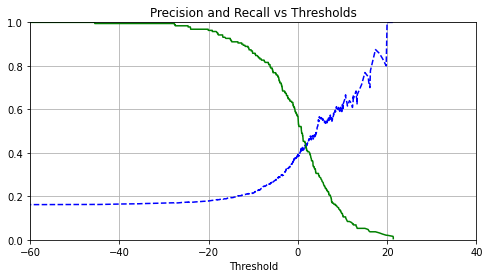

In [124]:
plt.figure(figsize=(8,4))
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

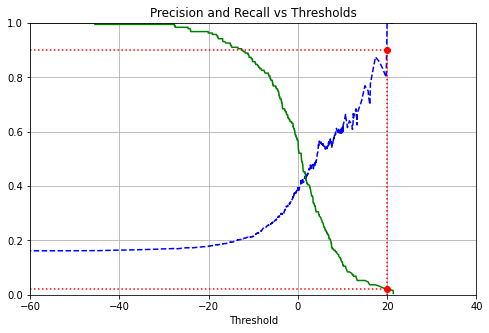

In [125]:
# Suppose if we are targetting 90% precision then,

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8,5))
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], 'r:')
plt.plot([-60, threshold_90_precision], [0.9, 0.9], 'r:')
plt.plot([-60, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro") 
plt.show()

In [ ]:
# So, with this we can see that if we want 90% precision then our threshold should be 20. and with this our recall
# will be roughly around 1% or 2%

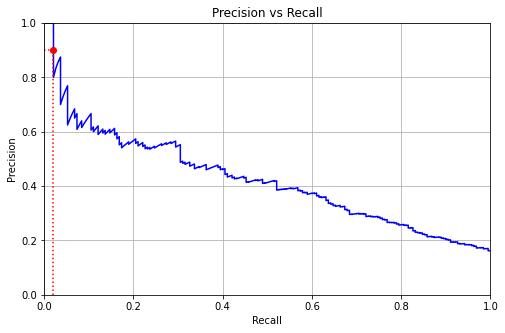

In [130]:
# Another way to select a good precision/recall tradeoff is to plot precision directly against recall

def plot_precision_vs_recall(recalls, precisions):
    plt.plot(recalls, precisions, 'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall')
    plt.grid(True)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8,5))
plot_precision_vs_recall(recalls, precisions)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [115]:
# Let's check the above

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [116]:
precision_score(y_true=employees_labels, y_pred=y_train_pred_90)

1.0

In [117]:
recall_score(y_true=employees_labels, y_pred=y_train_pred_90)

0.021052631578947368

In [ ]:
# Now we have a model with has 90% precision. But, A high-precision classifier is not very useful if its
# recall is too low!

In [ ]:
# NOTE: If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

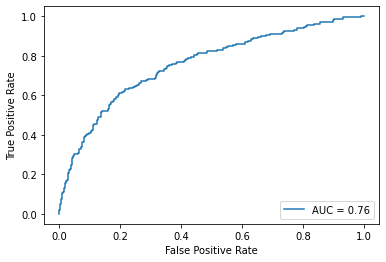

In [173]:
# The ROC Curve

# The receiver operating characteristic (ROC) curve is another common tool used with
# binary classifiers. It is very similar to the precision/recall curve, but instead of plotting
# precision versus recall, the ROC curve plots the true positive rate against the false positive rate.

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_true=employees_labels, y_score=y_scores)

display = RocCurveDisplay(fpr=fpr, 
                          tpr=tpr, 
                          roc_auc=roc_auc_score(y_true=employees_labels, y_score=y_scores))
display.plot()
plt.show()

In [174]:
roc_auc_score(y_true=employees_labels, y_score=y_scores)

0.7571581082523754

In [176]:
# So, our SGDClassifier model has:
# Precision: 39%
# Recall: 56%
# AUC of 76%

## 

In [178]:
# Now, Let's train a RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(estimator=forest_clf, X=employees_prepared, y=employees_labels, cv=3, 
                                    method='predict_proba')

In [182]:
y_scores_forest = y_probas_forest[:,1]

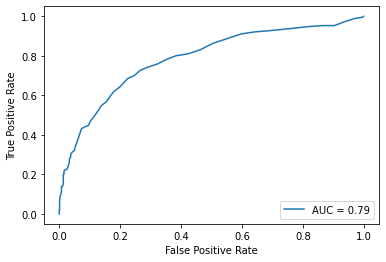

In [183]:
# Let's plot the ROC Curve

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_true=employees_labels, y_score=y_scores_forest)

roc_auc_score_forest = roc_auc_score(y_true=employees_labels, y_score=y_scores_forest)

display2 = RocCurveDisplay(fpr=fpr_forest, tpr=tpr_forest, roc_auc=roc_auc_score_forest)
display2.plot()
plt.show()

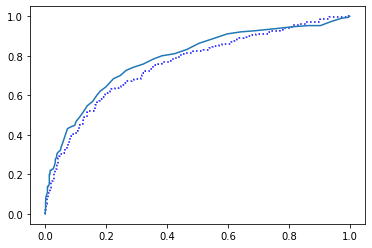

In [184]:
# Comparing the ROC curves of SGDClassifier and RandomForestClassifier

plt.plot(fpr, tpr, 'b:', label='SGD')
plt.plot(fpr_forest, tpr_forest, label='RF')
plt.show()

In [ ]:
# RandomForest Classifier is just slightly better than SGD Classifier

In [185]:
# Let's loot at the precision and recall of RandomForest Classifier

y_train_pred_forest = cross_val_predict(estimator=forest_clf, X=employees_prepared, y=employees_labels, cv=3, method='predict')

print(f'Precision: {precision_score(y_true=employees_labels, y_pred=y_train_pred_forest)}')
print(f'Recall: {recall_score(y_true=employees_labels, y_pred=y_train_pred_forest)}')

Precision: 0.7291666666666666
Recall: 0.18421052631578946


In [186]:
roc_auc_score_forest

0.7859506779118182

In [ ]:
# In RF Classifier: Precision is improved but the Recall has reduced and the AUC is just improved by 3% when compared to 
# SGD classifier